<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/LendingClub_Loan_Payback_Prediction_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data_info = pd.read_csv("lending_club_info.csv",index_col = 'LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [0]:
#create a function to read the describtion
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [6]:
#import the dataset 
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [0]:
df.info()

In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

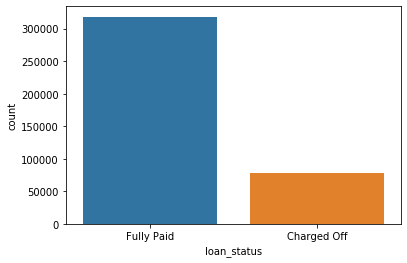

In [9]:
#EDA
sns.countplot("loan_status", data = df);

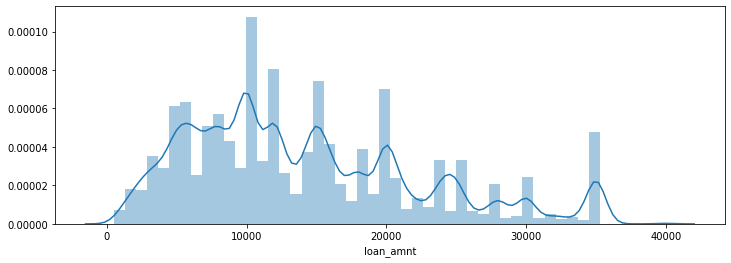

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"], bins = 50)

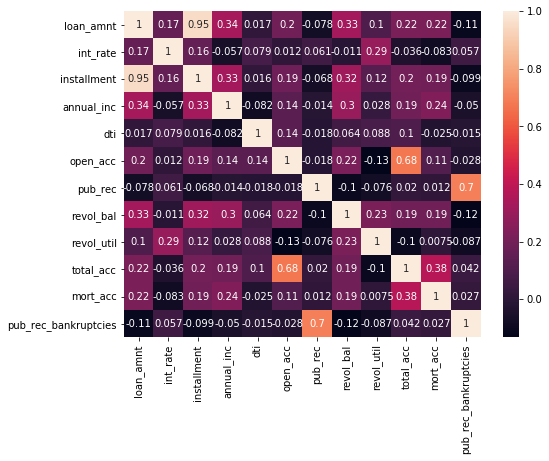

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

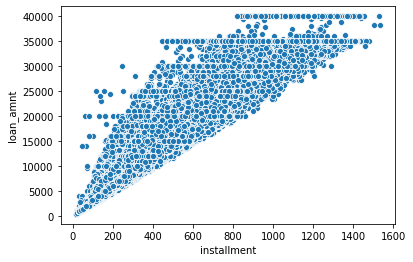

In [12]:
sns.scatterplot(x= "installment", y = "loan_amnt",data = df)

In [13]:
feat_info("installment"),feat_info("loan_amnt")

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


(None, None)

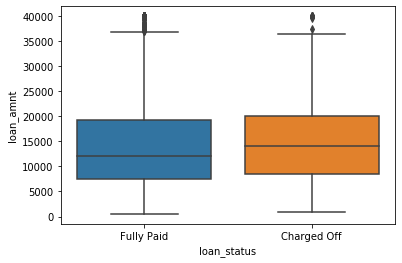

In [14]:
sns.boxplot(x = "loan_status", y = "loan_amnt",data = df )

In [15]:
df.groupby("loan_status").loan_amnt.describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


In [16]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

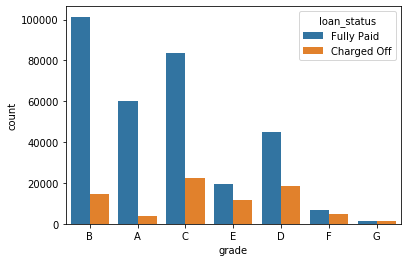

In [18]:
sns.countplot("grade", data = df, hue = "loan_status")

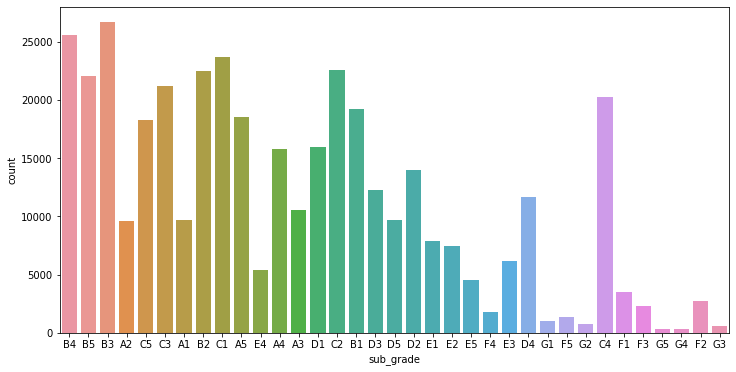

In [19]:
plt.figure(figsize = (12,6))
sns.countplot("sub_grade", data = df)

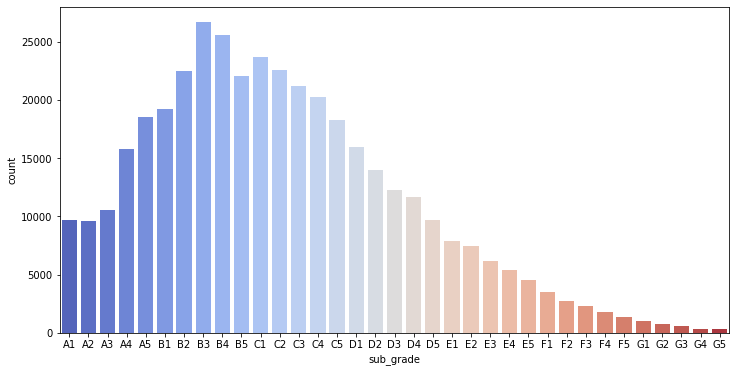

In [20]:
plt.figure(figsize = (12,6))
sns.countplot("sub_grade", order = sorted(df.sub_grade.unique()), data = df, palette = "coolwarm")

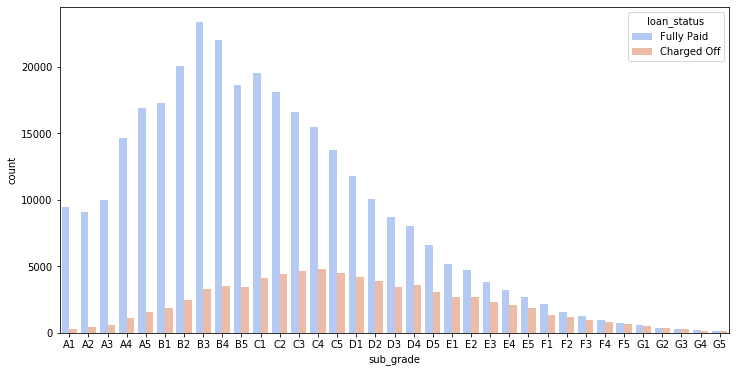

In [21]:
plt.figure(figsize = (12,6))
sns.countplot("sub_grade", order = sorted(df.sub_grade.unique()), data = df, hue= "loan_status",palette = "coolwarm")

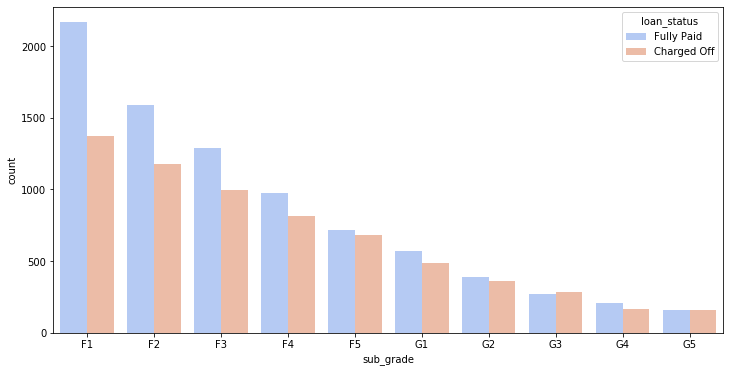

In [22]:
# F and G have low payback rate, look into this two
plt.figure(figsize = (12,6))
sns.countplot("sub_grade", order = sorted(df[(df.grade =="G")|(df.grade == "F")].sub_grade.unique()), data = df[(df.grade =="G")|(df.grade == "F")], hue= "loan_status",palette = "coolwarm")

In [0]:
#create a new column called loan_repaid, assigning 1 to "fully paid", and 0 to "charged off" loan status
df["loan_repaid"] = df.loan_status.map({"Fully Paid": 1, "Charged Off": 0})

In [24]:
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


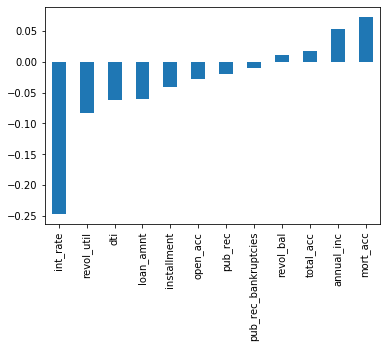

In [25]:
df.corr()["loan_repaid"][:-1].sort_values().plot(kind = "bar")

In [0]:
#data preprosessing

In [27]:
#find out the missing value of each column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
df.isnull().sum() / len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
df.emp_title.nunique()

173105

In [30]:
df.emp_title.value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
EVP of Strategic Development          1
Senior Application QA Analyst         1
The Texas A&M University System       1
Power Plant Supervisor                1
Director Etireworld Division          1
Name: emp_title, Length: 173105, dtype: int64

In [0]:
#drop the emp_title as there are too many variable to convert to dummy variable
df = df.drop("emp_title", axis = 1)

In [32]:
# crate a countplot to look at the emp_length
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [0]:
emp_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
  '10+ years'
]

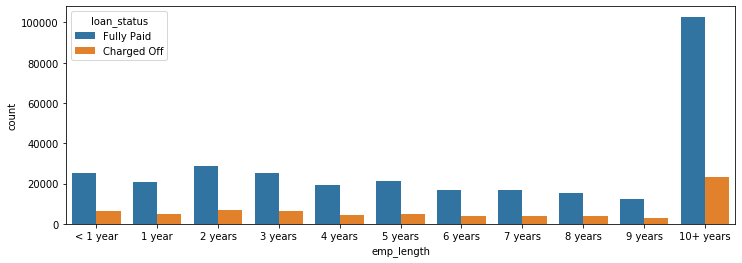

In [34]:

plt.figure(figsize = (12,4))
sns.countplot("emp_length",order = emp_length_order, data = df, hue = "loan_status")

In [0]:
# find out the pecentage of charged off per employment category
emp_co = df[df.loan_status == "Charged Off"].groupby("emp_length").count()["loan_status"]

In [0]:

emp_fp = df[df.loan_status == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [37]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

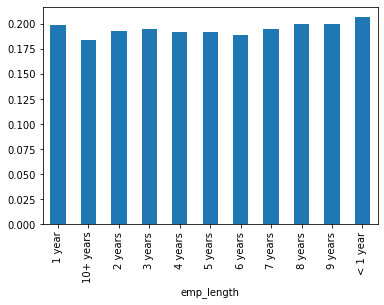

In [38]:
emp_len = emp_co/(emp_co +emp_fp)
emp_len.plot(kind="bar")

In [0]:
# We drop off the emp_lenth as the charged off rates are very similara cross all empployment length.
df = df.drop("emp_length", axis = 1)

In [0]:
df = df.drop("title", axis = 1)

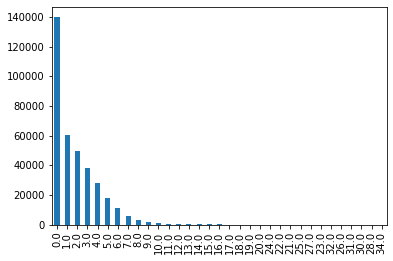

In [41]:
df.mort_acc.value_counts().plot(kind="bar")

In [42]:
# find out the correlation with the mort_acc column
df.corr().mort_acc.sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [0]:
# total_acc has the highest correlation with the mort_acc. we group the dataframe by the total acc and calculate the mean value for the mort_acc per total acc entry
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [44]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [0]:
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):

        return total_acc_avg[total_acc]

    else:

        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [46]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [0]:
df = df.dropna()

In [48]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [49]:
# Categorical Variable and dummy Variable
#find out the categorical column
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
#convert the term feature into either a 36 or 60 integer numeric data type using apply function
df.term.value_counts()


 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [0]:
df["term"] = df.term.apply(lambda term: int(term[:3]))

In [0]:
#greate features is part of the sub_grade, so we will drop it 
df = df.drop("grade", axis=1)

In [0]:
#convert subgrade to dummy variables
#get the dummies varible
dummies = pd.get_dummies(df.sub_grade,drop_first = True)
#drop the variable and concate the dataframe with dummies variables
df = pd.concat([df.drop("sub_grade", axis = 1), dummies],axis = 1)

In [0]:
#convert varification_status, application type, initial_list_status, purpose to dummy variables
#get the dummies varible
dummies = pd.get_dummies(df[["verification_status",'application_type','purpose','initial_list_status']] ,drop_first = True)
#drop the variable and concate the dataframe with dummies variables
df = pd.concat([df.drop(["verification_status",'application_type','purpose','initial_list_status'], axis = 1), dummies],axis = 1)

In [55]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_stat

In [56]:
#homeownership
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [0]:
#put none and any to other using replace function
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"],'OTHER')


In [0]:
#convert home_ownership to dummy variables
#get the dummies varible
dummies = pd.get_dummies(df.home_ownership,drop_first = True)
#drop the variable and concate the dataframe with dummies variables
df = pd.concat([df.drop("home_ownership", axis = 1), dummies],axis = 1)

In [0]:
#ADDRESS, Create a column called "zip_code" that extracts the zip code from the address column
df["zip_code"] = df['address'].apply(lambda address: address[-5:])

In [60]:
df.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [0]:
#since there are only 10 zipcode,we can convert it to dummy variables

#convert zip_code to dummy variables
#get the dummies varible
dummies = pd.get_dummies(df.zip_code,drop_first = True)
#drop the variable and concate the dataframe with dummies variables
df = pd.concat([df.drop("zip_code", axis = 1), dummies],axis = 1)


In [0]:
df = df.drop("address", axis = 1)

In [0]:
#issue_d should be dropped as we dont know if the loan will be issued when runing the model
df = df.drop("issue_d", axis = 1)

In [64]:
df.earliest_cr_line

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [0]:
#get the year info for earliest_cr_line: get the last 4 digit and conver it to integer
df["earliest_cr_line"] = df.earliest_cr_line.apply(lambda date: int(date[-4:]))

In [66]:
df["earliest_cr_line"].value_counts


<bound method IndexOpsMixin.value_counts of 0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64>

In [67]:
df.loan_repaid, df.loan_status

(0         1
 1         1
 2         1
 3         1
 4         0
          ..
 396025    1
 396026    1
 396027    1
 396028    1
 396029    1
 Name: loan_repaid, Length: 395219, dtype: int64, 0          Fully Paid
 1          Fully Paid
 2          Fully Paid
 3          Fully Paid
 4         Charged Off
              ...     
 396025     Fully Paid
 396026     Fully Paid
 396027     Fully Paid
 396028     Fully Paid
 396029     Fully Paid
 Name: loan_status, Length: 395219, dtype: object)

In [0]:
#drop the loan_status column as it is duplicated
df= df.drop("loan_status", axis = 1)

In [0]:
#train test split
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop("loan_repaid", axis = 1).values
y = df['loan_repaid'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 101)

In [0]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)


In [0]:
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [0]:
model = Sequential()
model.add(Dense(78, activation="relu"))
# add a dropout after each model, with a 50% random probability of turn off to avoid overfitting
model.add(Dropout(0.5))
# adding more layer, and reduce it by half each time
model.add(Dense(39, activation="relu"))
model.add(Dropout(0.5))

# adding more layer, and reduce it by half each time
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer = "adam")

In [134]:
X_train.shape

(316175, 78)

In [0]:
# Fit the model to the training data for at least 25 epochs, also add in the validation data for later plotting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose= 1, patience = 25)
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop])

In [0]:
# save your model
model.save("myfavoritemodels.h5")

In [0]:
# Evaluate the model performance
losses = pd.DataFrame(model.history.history)

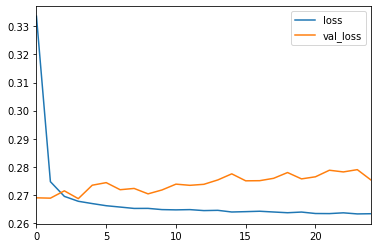

In [140]:
losses.plot()

In [0]:
# create predictions from the X_test set and display a classification  report  and confusion matrix for the X_test set
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(X_test)

In [142]:
# The f1-score of the 0 class if what actually show you if the prediction doing well
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [143]:
confusion_matrix(y_test,predictions)

array([[ 6721,  8937],
       [    4, 63382]])

In [0]:
# Given the customer below, would you offer this person a loan?

In [144]:
import random
random.seed(101)
random_ind = random.randint(0, len(df))

new_customer = df.drop("loan_repaid", axis = 1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [145]:
# reshape the data to the model shape
new_customer.values.reshape(1,78)

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
        6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [0]:
# take the scaler and transfer the data and assign it as new customer
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [147]:
# predict if the class to see if the new customer pay the loan
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [148]:
#new check if the person actually end up paying back their loan
df.iloc[random_ind]["loan_repaid"]

1.0